# Import Libraries

In [1]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

from pathlib import Path
from fastai.vision.all import *

# Set up path for training data

In [2]:
# Set seed for reproducibility
torch.manual_seed(40)
np.random.seed(40)

# Path to the dataset
data = "/kaggle/input/face-mask-dataset/data"
path = Path(data)
path.ls()

(#2) [Path('/kaggle/input/face-mask-dataset/data/without_mask'),Path('/kaggle/input/face-mask-dataset/data/with_mask')]

# Data preparation

In [3]:
data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2, item_tfms=Resize(224), 
                                    batch_tfms=aug_transforms(), num_workers=4, normalize=imagenet_stats)

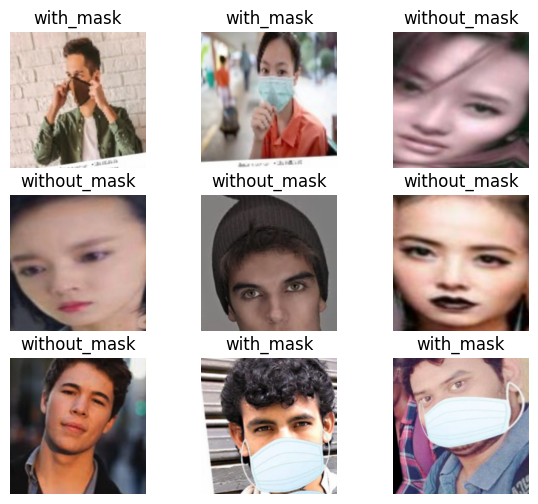

In [4]:
data.show_batch(nrows=3, figsize=(7, 6))

In [5]:
data.c

2

In [6]:
# Create a learner
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], model_dir=Path('/kaggle/working'))

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 139MB/s] 


SuggestedLRs(valley=0.0010000000474974513)

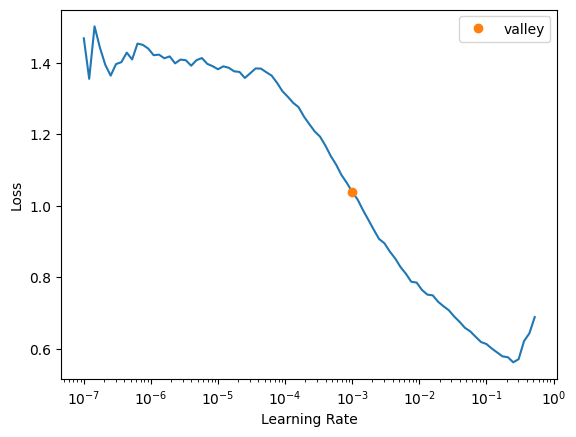

In [7]:
# Find a good learning rate
learn.lr_find()

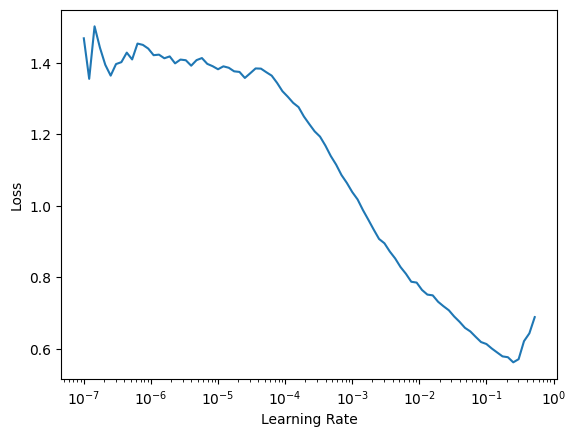

In [8]:
# Plot the learning rate finder plot with suggestions
learn.recorder.plot_lr_find()

In [9]:
# Train the model
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4, slice(lr1, lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.464722,1.064227,0.952318,00:49
1,0.340929,0.114916,0.991391,00:52
2,0.130366,0.031035,0.994040,00:53
3,0.058630,0.019629,0.995364,00:53


In [10]:
# Unfreeze and train further
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.058496,0.015840,0.996689,01:12
1,0.054020,0.033312,0.994040,01:10
2,0.074822,0.009408,0.997351,01:10
3,0.038036,0.020017,0.996027,01:10
4,0.037528,0.005879,0.998013,01:10
5,0.027714,0.240002,0.996027,01:10
6,0.016362,0.011815,0.998676,01:10
7,0.014944,0.007338,0.998013,01:11
8,0.005691,0.003782,0.998676,01:11
9,0.005980,0.003266,0.998676,01:11


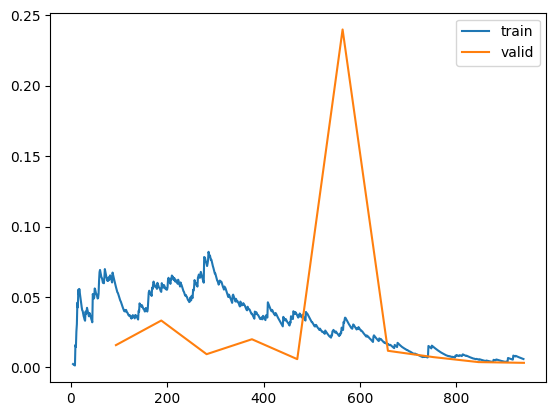

In [12]:
# Plot losses
learn.recorder.plot_loss()

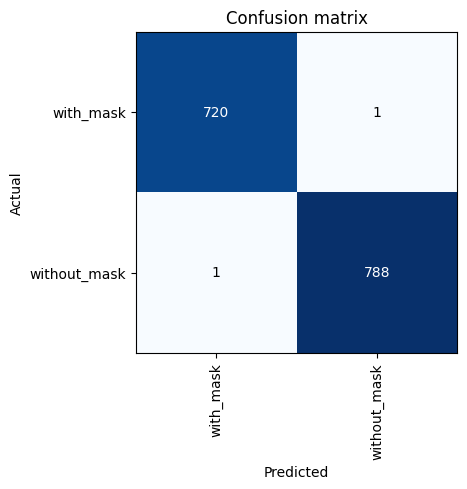

In [13]:
# Interpretation and confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [14]:
# Export the trained model
export_path = Path("/kaggle/working/FaceMask.pkl")
learn.export(export_path)

In [16]:
# Save the model
model_path = learn.save("stage-1")
print(f"Model saved at: {model_path}")

Model saved at: /kaggle/working/stage-1.pth
